# Decision Tree Regression

## Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the same dataset on Position salaries

In [3]:
df = pd.read_csv("Position_Salaries.csv")
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


## Since our dataset is small we don't have to split it into train and test

In [4]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2:].values

## No need to feature scaling here in this lab

### Import the Descision Tree Regressor from the sklearn.tree

In [5]:
from sklearn.tree import DecisionTreeRegressor

### Create an instance of the imported class and call it 'regressor'. You can try different parameters when making the object. Please, refer to the documentation of the class in order to get more information about the parameters.

In [6]:
regressor = DecisionTreeRegressor(max_depth=5)

### Fit your data into the regressor

In [7]:
regressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Make a prediction on a single value (level - 6.5)

In [8]:
regressor.predict(6.5)

array([150000.])

### Print out the result

In [9]:
regressor.predict(X)

array([  47500.,   47500.,   60000.,   80000.,  110000.,  150000.,
        200000.,  300000.,  500000., 1000000.])

### Now you can visualize the result

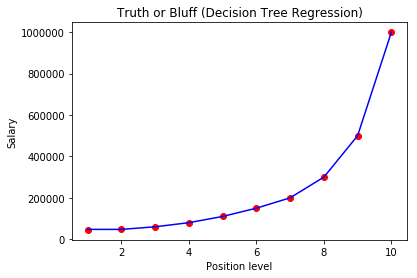

In [10]:
# Visualising the Decision Tree Regression results (higher resolution)
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### Have you noticed something wrong with the plot? This is because we use the low scale of representing the data
### Remember that DT takes the average of each {X} clusters outputs. But here, we simply connected each dot continuously, whereas we have to get the average

## You have to increase the scale. Remeber we were making the X_grid with higher resolution scale? Make the same here
### Use numpy for making a list of values starting from minimum(X) and ending maximum(X), let the step be 0.01

In [11]:
X_grid = np.arange(min(X), max(X), 0.01)

## You should be getting an ndarray of shape (900,). In order to proceed, reshape it, so that it becomes an ndarray (900,1)

In [12]:
X_grid = X_grid.reshape((len(X_grid),1))

## Now plot the results

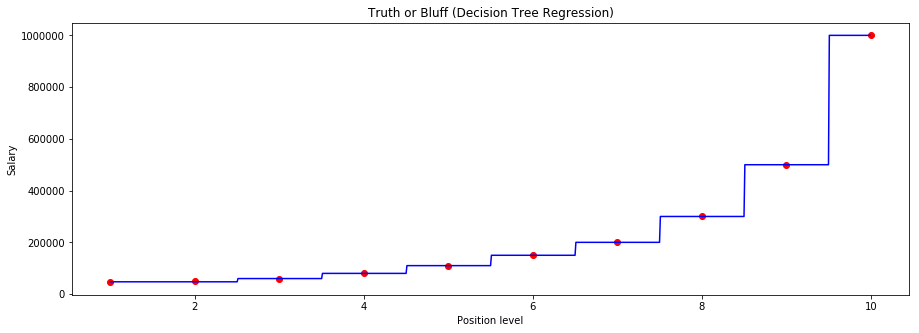

In [13]:
# Visualising the Decision Tree Regression results (higher resolution)

plt.figure(figsize=(15,5))   # use this to get a bigger image
plt.scatter( X,  y, color = 'red')   # plot the actual data. For that, fill the blank spaces with your actual data
plt.plot( X_grid,  regressor.predict(X_grid), color = 'blue')    # now make the predictions using regressor and the X_grid you've just created
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### you should get something like this

### the code below can be executed only if you have the pydotplus package and GraphViz tool installed (not the university's PC)

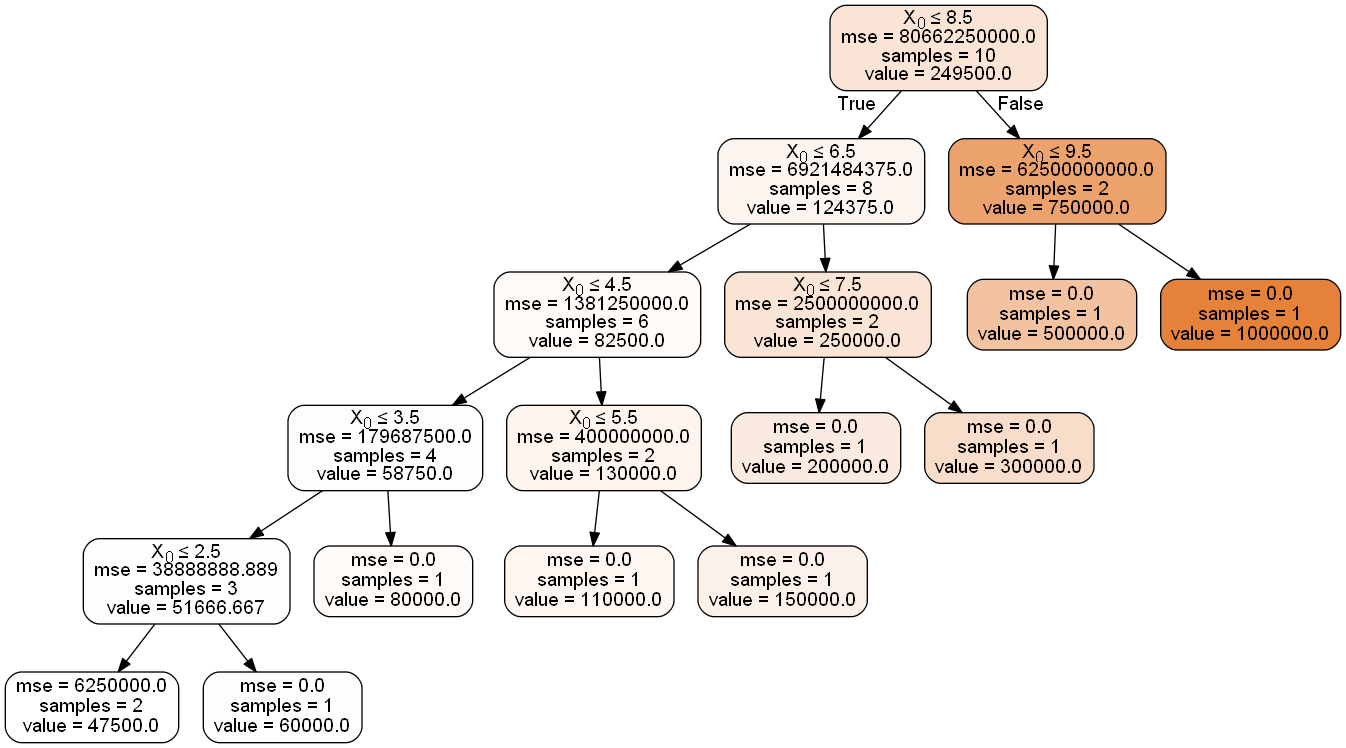

In [15]:
import os     

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(regressor, out_file=dot_data, max_depth=5,
filled=True, rounded=True,
special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### your graph structure